<a href="https://colab.research.google.com/github/Pamela1005/WEBSCRAPING_PROJECT/blob/main/WebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install requests beautifulsoup4 pandas matplotlib

In [10]:
# -----------------------------------------
# Live Cricket Score Scraper (RSS Version)
# Scrapes live cricket scores from ESPN CricInfo RSS feed
# Displays team names, score, and overs in a clean table
# -----------------------------------------

import requests
from bs4 import BeautifulSoup
import pandas as pd
from tabulate import tabulate
import re

def fetch_live_scores():
    url = "https://www.espncricinfo.com/rss/content/story/feeds/0.xml"
    response = requests.get(url)
    response.raise_for_status()

    soup = BeautifulSoup(response.content, "xml")
    items = soup.find_all("item")

    matches = []
    for item in items:
        title = item.title.text.strip()
        desc = item.description.text.strip()

        # Try to extract team names, scores, and overs from the text
        # This is heuristic because RSS isn't structured
        teams = re.findall(r"([A-Z][a-z]+(?: [A-Z][a-z]+)?)", title)
        score_info = re.findall(r"(\d+/\d+|\d+ all out|\d+)", desc)
        overs_info = re.findall(r"\d+\.\d+ overs|\d+ overs", desc)

        team_names = " vs ".join(teams[:2]) if len(teams) >= 2 else title
        score = ", ".join(score_info[:2]) if score_info else "N/A"
        overs = ", ".join(overs_info[:2]) if overs_info else "N/A"

        matches.append({
            "Teams": team_names,
            "Score": score,
            "Overs": overs
        })

    return pd.DataFrame(matches)

if __name__ == "__main__":
    print("\nLIVE CRICKET SCORES (From RSS Feed)\n" + "-" * 50)
    df = fetch_live_scores()

    if df.empty:
        print("No live match data found. Try again later.")
    else:
        # Print as clean table
        print(tabulate(df, headers="keys", tablefmt="grid", showindex=False))



LIVE CRICKET SCORES (From RSS Feed)
--------------------------------------------------
+------------------------------------------------------------------------------+----------+----------+
| Teams                                                                        | Score    | Overs    |
+==============================================================================+==========+==========+
| Bangladesh vs Pakistan                                                       | N/A      | N/A      |
+------------------------------------------------------------------------------+----------+----------+
| Reddy vs England                                                             | N/A      | N/A      |
+------------------------------------------------------------------------------+----------+----------+
| Rahul vs India                                                               | 85, 185  | N/A      |
+------------------------------------------------------------------------------+--------


SCRAPING BOOK DATA...

Data saved to 'books_data.csv'

ANALYSIS:
Average Book Price: £34.56
Best-Rated Book: 'Sapiens: A Brief History of Humankind' (Rating: Five, Price: £54.23)


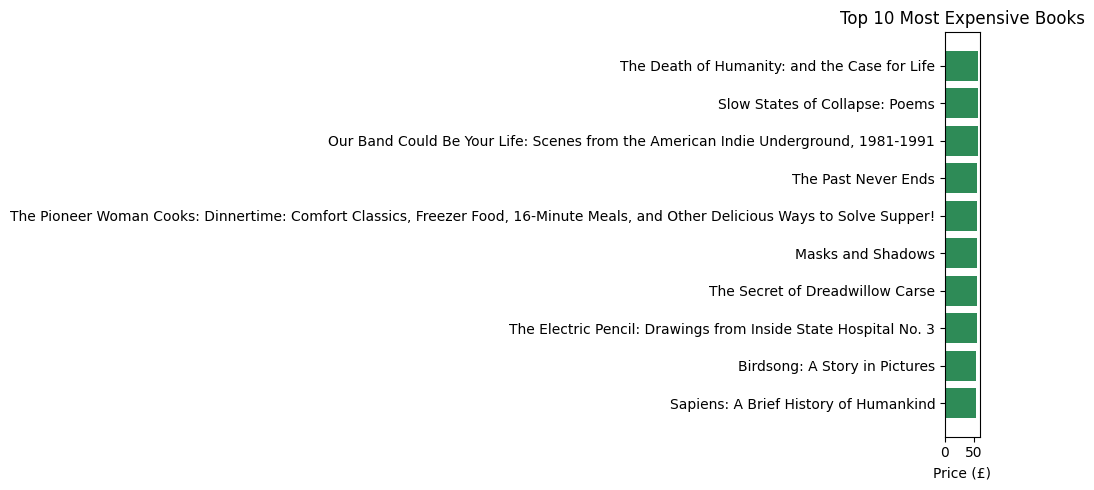

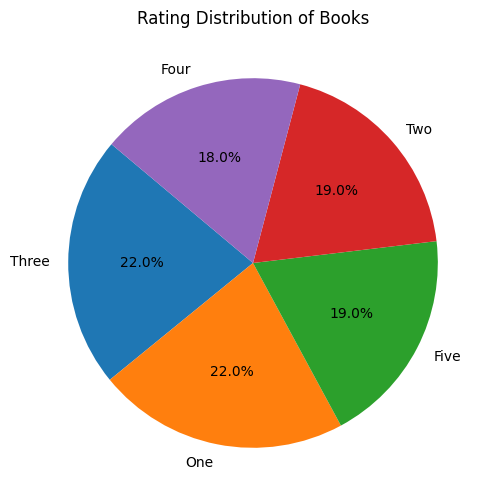

In [7]:
# -----------------------------------------
# Top Books Scraper Project
# Scrapes book title, price, and rating from Books to Scrape
# Saves data to CSV, finds average price, best-rated book,
# and plots visualizations.
# -----------------------------------------

import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

BASE_URL = "https://books.toscrape.com/catalogue/page-{}.html"

# Mapping star text to numeric value for comparison
RATING_MAP = {
    "One": 1,
    "Two": 2,
    "Three": 3,
    "Four": 4,
    "Five": 5
}

def scrape_books(pages=5):
    books = []

    for page in range(1, pages + 1):
        url = BASE_URL.format(page)
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, "html.parser")
        articles = soup.find_all("article", class_="product_pod")

        for article in articles:
            title = article.h3.a["title"].strip()
            price_text = article.find("p", class_="price_color").text.strip()
            price = float(price_text[1:])  # remove £ symbol

            rating_class = article.find("p")["class"][1]  # e.g., "Three"
            rating_value = RATING_MAP.get(rating_class, 0)

            books.append({
                "Title": title,
                "Price (£)": price,
                "Rating": rating_class,
                "Rating (Numeric)": rating_value
            })

    return pd.DataFrame(books)

def analyze_books(df):
    avg_price = df["Price (£)"].mean()
    best_rated = df.loc[df["Rating (Numeric)"].idxmax()]
    return avg_price, best_rated

def plot_price_chart(df):
    # Top 10 most expensive books
    top10 = df.sort_values("Price (£)", ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    plt.barh(top10["Title"], top10["Price (£)"], color="seagreen")
    plt.xlabel("Price (£)")
    plt.title("Top 10 Most Expensive Books")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

def plot_rating_distribution(df):
    rating_counts = df["Rating"].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(rating_counts, labels=rating_counts.index, autopct="%1.1f%%", startangle=140)
    plt.title("Rating Distribution of Books")
    plt.show()

if __name__ == "__main__":
    print("\nSCRAPING BOOK DATA...\n")
    df = scrape_books(pages=5)  # scrape first 5 pages (100 books)

    # Save to CSV
    df.to_csv("books_data.csv", index=False)
    print("Data saved to 'books_data.csv'")

    # Analysis
    avg_price, best_rated = analyze_books(df)
    print("\nANALYSIS:")
    print(f"Average Book Price: £{avg_price:.2f}")
    print(f"Best-Rated Book: '{best_rated['Title']}' (Rating: {best_rated['Rating']}, Price: £{best_rated['Price (£)']})")

    # Visualization
    plot_price_chart(df)
    plot_rating_distribution(df)
